In [18]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall, Statistics, Distributions, Dierckx
using KernelDensity: kde
@pyimport numpy as np
@pyimport scienceplots

In [19]:
obs10deg = CSV.read("../MPC/observation/obs_10deg_EF.csv", DataFrame)
obs20deg = CSV.read("../MPC/observation/obs_20deg_EF.csv", DataFrame)
obs35deg = CSV.read("../MPC/observation/obs_35deg_EF.csv", DataFrame)

Row,time,u,v,r,x,y,ψ,x1,y1,x2,y2,δ,n_p,X_wind,Y_wind,N_wind,U_W,Ψ_W,X_F,Y_F,N_F
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,1.17,0.0,0.0,0.0,0.0,0.0,3.0,0.0,-3.0,0.0,0.610865,18.95,-0.190974,-2.47896e-19,2.60291e-18,0.0,3.14159,0.0,0.0,0.0
2,0.25,1.17365,-0.00627179,0.00775535,0.2925,0.0,0.0,3.2925,0.0,-2.7075,3.67394e-16,0.610865,18.95,-0.192657,0.00183482,0.00304997,0.0,3.14159,0.0,0.0,0.0
3,0.5,1.17731,-0.0132646,0.0149754,0.585911,-0.00156795,0.00193884,3.58591,0.00424856,-2.41408,-0.00738446,0.610865,18.95,-0.19441,0.00394357,0.00652171,0.0,3.14159,0.0,0.0,0.0
4,0.75,1.18092,-0.0209154,0.021743,0.880244,-0.00431343,0.0056827,3.8802,0.0127346,-2.11971,-0.0213614,0.610865,18.95,-0.196204,0.00632452,0.0104017,0.0,3.14159,0.0,0.0,0.0
5,1.0,1.18441,-0.0291653,0.0281255,1.1755,-0.00786451,0.0111185,4.17531,0.0254902,-1.82432,-0.0412192,0.610865,18.95,-0.198015,0.00897565,0.0146759,0.0,3.14159,0.0,0.0,0.0
6,1.25,1.18773,-0.0379574,0.0341773,1.47166,-0.0118632,0.0181498,4.47117,0.0425832,-1.52784,-0.0663097,0.610865,18.95,-0.199817,0.011894,0.019329,0.0,3.14159,0.0,0.0,0.0
7,1.5,1.19082,-0.0472365,0.0399422,1.76872,-0.015962,0.0266942,4.76765,0.0641109,-1.23021,-0.096035,0.610865,18.95,-0.201585,0.0150748,0.0243433,0.0,3.14159,0.0,0.0,0.0
8,1.75,1.19361,-0.0569479,0.0454541,2.06663,-0.0198209,0.0366797,5.06462,0.0901935,-0.931348,-0.129835,0.610865,18.95,-0.203296,0.0185114,0.029698,0.0,3.14159,0.0,0.0,0.0
9,2.0,1.19605,-0.0670362,0.0507389,2.36536,-0.0231055,0.0480432,5.3619,0.120969,-0.631181,-0.16718,0.610865,18.95,-0.204926,0.0221941,0.0353689,0.0,3.14159,0.0,0.0,0.0


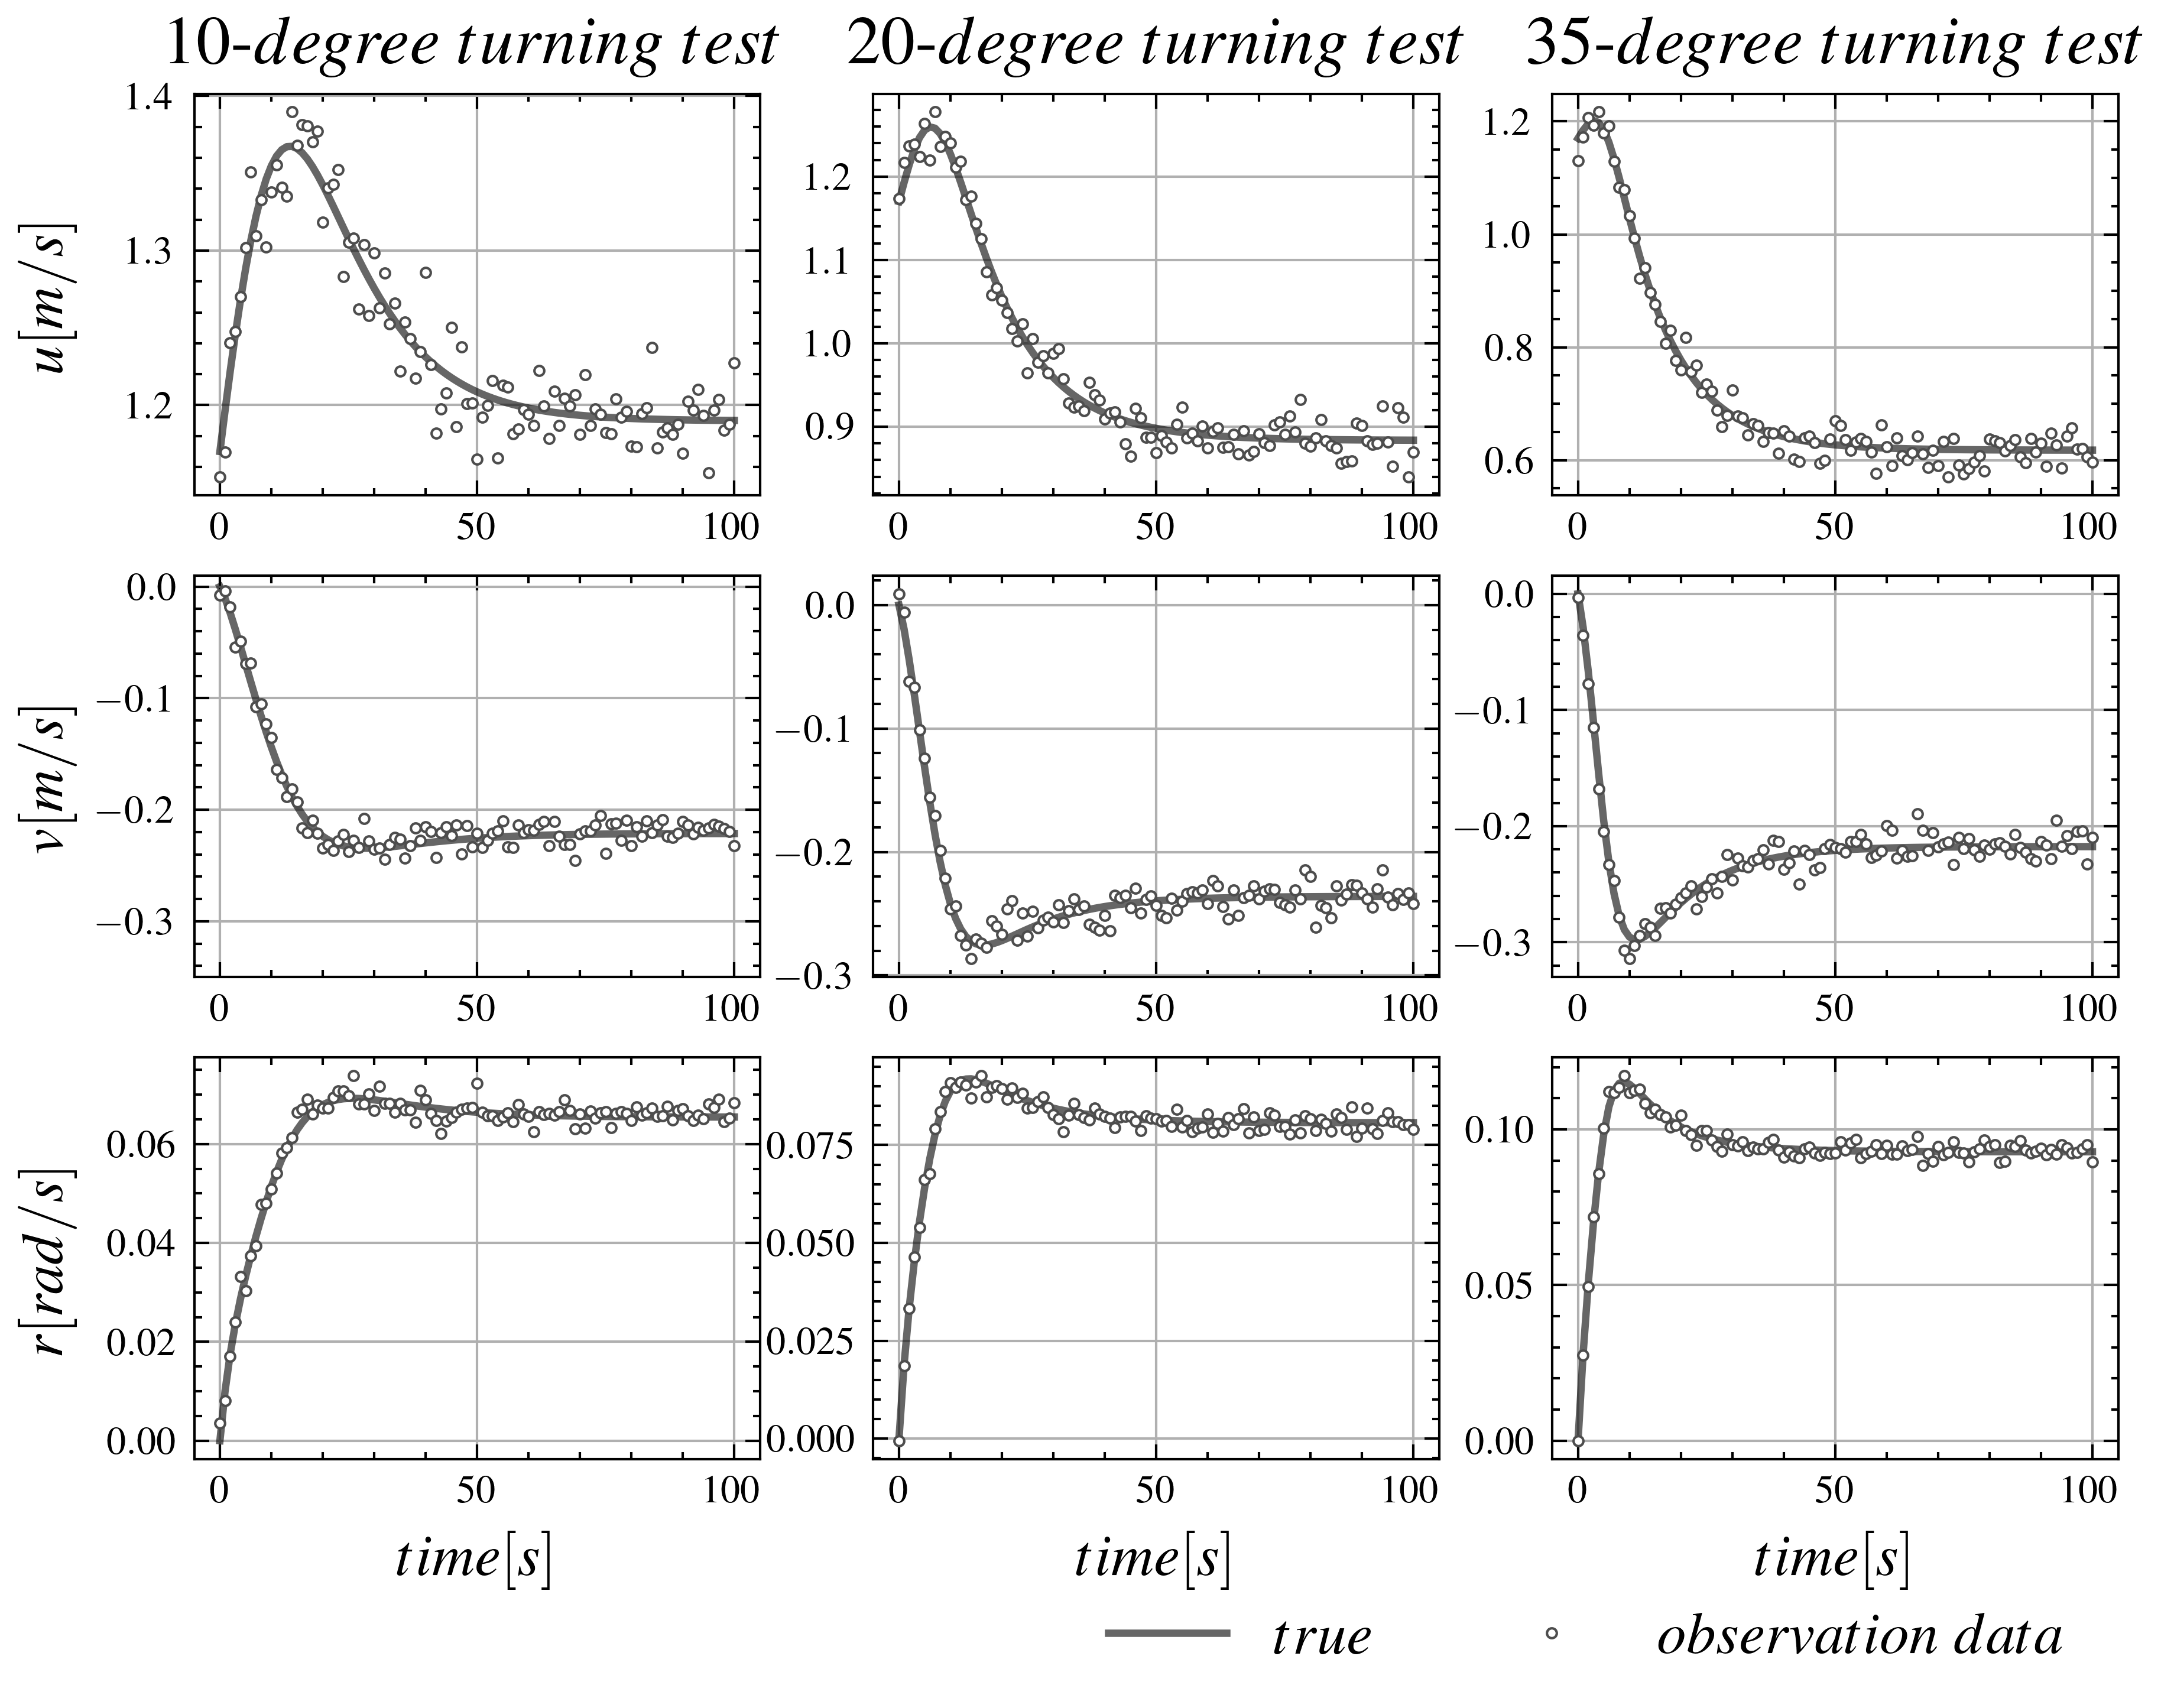

In [23]:
plt.style.use(["science", "ieee"])

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(3, 3, 1)
ax.set_title(L"10\mathchar`-degree~turning~test", fontsize=14)
# ax.set_title(L"Noise~L1", fontsize=14)
ax.plot(obs10deg[1:4:401,"time"], obs10deg[1:4:401,"u"], "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs10deg[1:4:401,"time"], obs10deg[1:4:401,"u"].+rand(Normal(0.0,0.02), 101), "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
ax.set_ylabel(L"$u [m/s]$", fontsize=12)
ax.grid()
# ax.set_ylim(0.7, 1.35)

ax = fig.add_subplot(3, 3, 4)
ax.plot(obs10deg[1:4:401,"time"], obs10deg[1:4:401,"v"],  "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs10deg[1:4:401,"time"], obs10deg[1:4:401,"v"].+rand(Normal(0.0,0.01), 101),  "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
ax.set_ylabel(L"$v [m/s]$", fontsize=12)
ax.set_ylim(-0.35, 0.01)
ax.grid()

ax = fig.add_subplot(3, 3, 7)
ax.plot(obs10deg[1:4:401,"time"], obs10deg[1:4:401,"r"],  "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs10deg[1:4:401,"time"], obs10deg[1:4:401,"r"].+rand(Normal(0.0,0.002), 101),  "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
ax.set_ylabel(L"$r [rad/s]$", fontsize=12)
ax.set_xlabel(L"time[s]", fontsize=12)
# ax.set_ylim(-0.01, 0.105)
ax.grid()

ax = fig.add_subplot(3, 3, 2)
ax.set_title(L"20\mathchar`-degree~turning~test", fontsize=14)
# ax.set_title(L"Noise~L2", fontsize=14)
ax.plot(obs20deg[1:4:401,"time"], obs20deg[1:4:401,"u"], "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs20deg[1:4:401,"time"], obs20deg[1:4:401,"u"].+rand(Normal(0.0,0.02), 101), "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
# ax.set_ylim(0.7, 1.35)
ax.grid()

ax = fig.add_subplot(3, 3, 5)
ax.plot(obs20deg[1:4:401,"time"], obs20deg[1:4:401,"v"],  "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs20deg[1:4:401,"time"], obs20deg[1:4:401,"v"].+rand(Normal(0.0,0.01), 101),  "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
# ax.set_ylim(-0.35, 0.01)
ax.grid()

ax = fig.add_subplot(3, 3, 8)
ax.plot(obs20deg[1:4:401,"time"], obs20deg[1:4:401,"r"],  "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs20deg[1:4:401,"time"], obs20deg[1:4:401,"r"].+rand(Normal(0.0,0.002), 101),  "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
# ax.set_ylim(-0.01, 0.105)
ax.set_xlabel(L"time[s]", fontsize=12)
ax.grid()


ax = fig.add_subplot(3, 3, 3)
ax.set_title(L"35\mathchar`-degree~turning~test", fontsize=14)
# ax.set_title(L"Noise~L3", fontsize=14)
ax.plot(obs35deg[1:4:401,"time"], obs35deg[1:4:401,"u"], "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs35deg[1:4:401,"time"], obs35deg[1:4:401,"u"].+rand(Normal(0.0,0.02), 101), "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
# ax.set_ylim(0.7, 1.35)
ax.grid()

ax = fig.add_subplot(3, 3, 6)
ax.plot(obs35deg[1:4:401,"time"], obs35deg[1:4:401,"v"],  "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs35deg[1:4:401,"time"], obs35deg[1:4:401,"v"].+rand(Normal(0.0,0.01), 101),  "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
# ax.set_ylim(-0.35, 0.01)
ax.grid()

ax = fig.add_subplot(3, 3, 9)
ax.plot(obs35deg[1:4:401,"time"], obs35deg[1:4:401,"r"], label=L"true",  "-", c="k", linewidth=1.5, alpha=0.6)
ax.plot(obs35deg[1:4:401,"time"], obs35deg[1:4:401,"r"].+rand(Normal(0.0,0.002), 101), label=L"observation~data", "o", c="0.3", markersize=2, markerfacecolor="w", markeredgewidth=0.5)
ax.legend(bbox_to_anchor=(1, -0.25), fontsize=12, ncol=2)
ax.set_xlabel(L"time[s]", fontsize=12)
# ax.set_ylim(-0.01, 0.105)
ax.grid()

fig.align_labels()

display(fig)

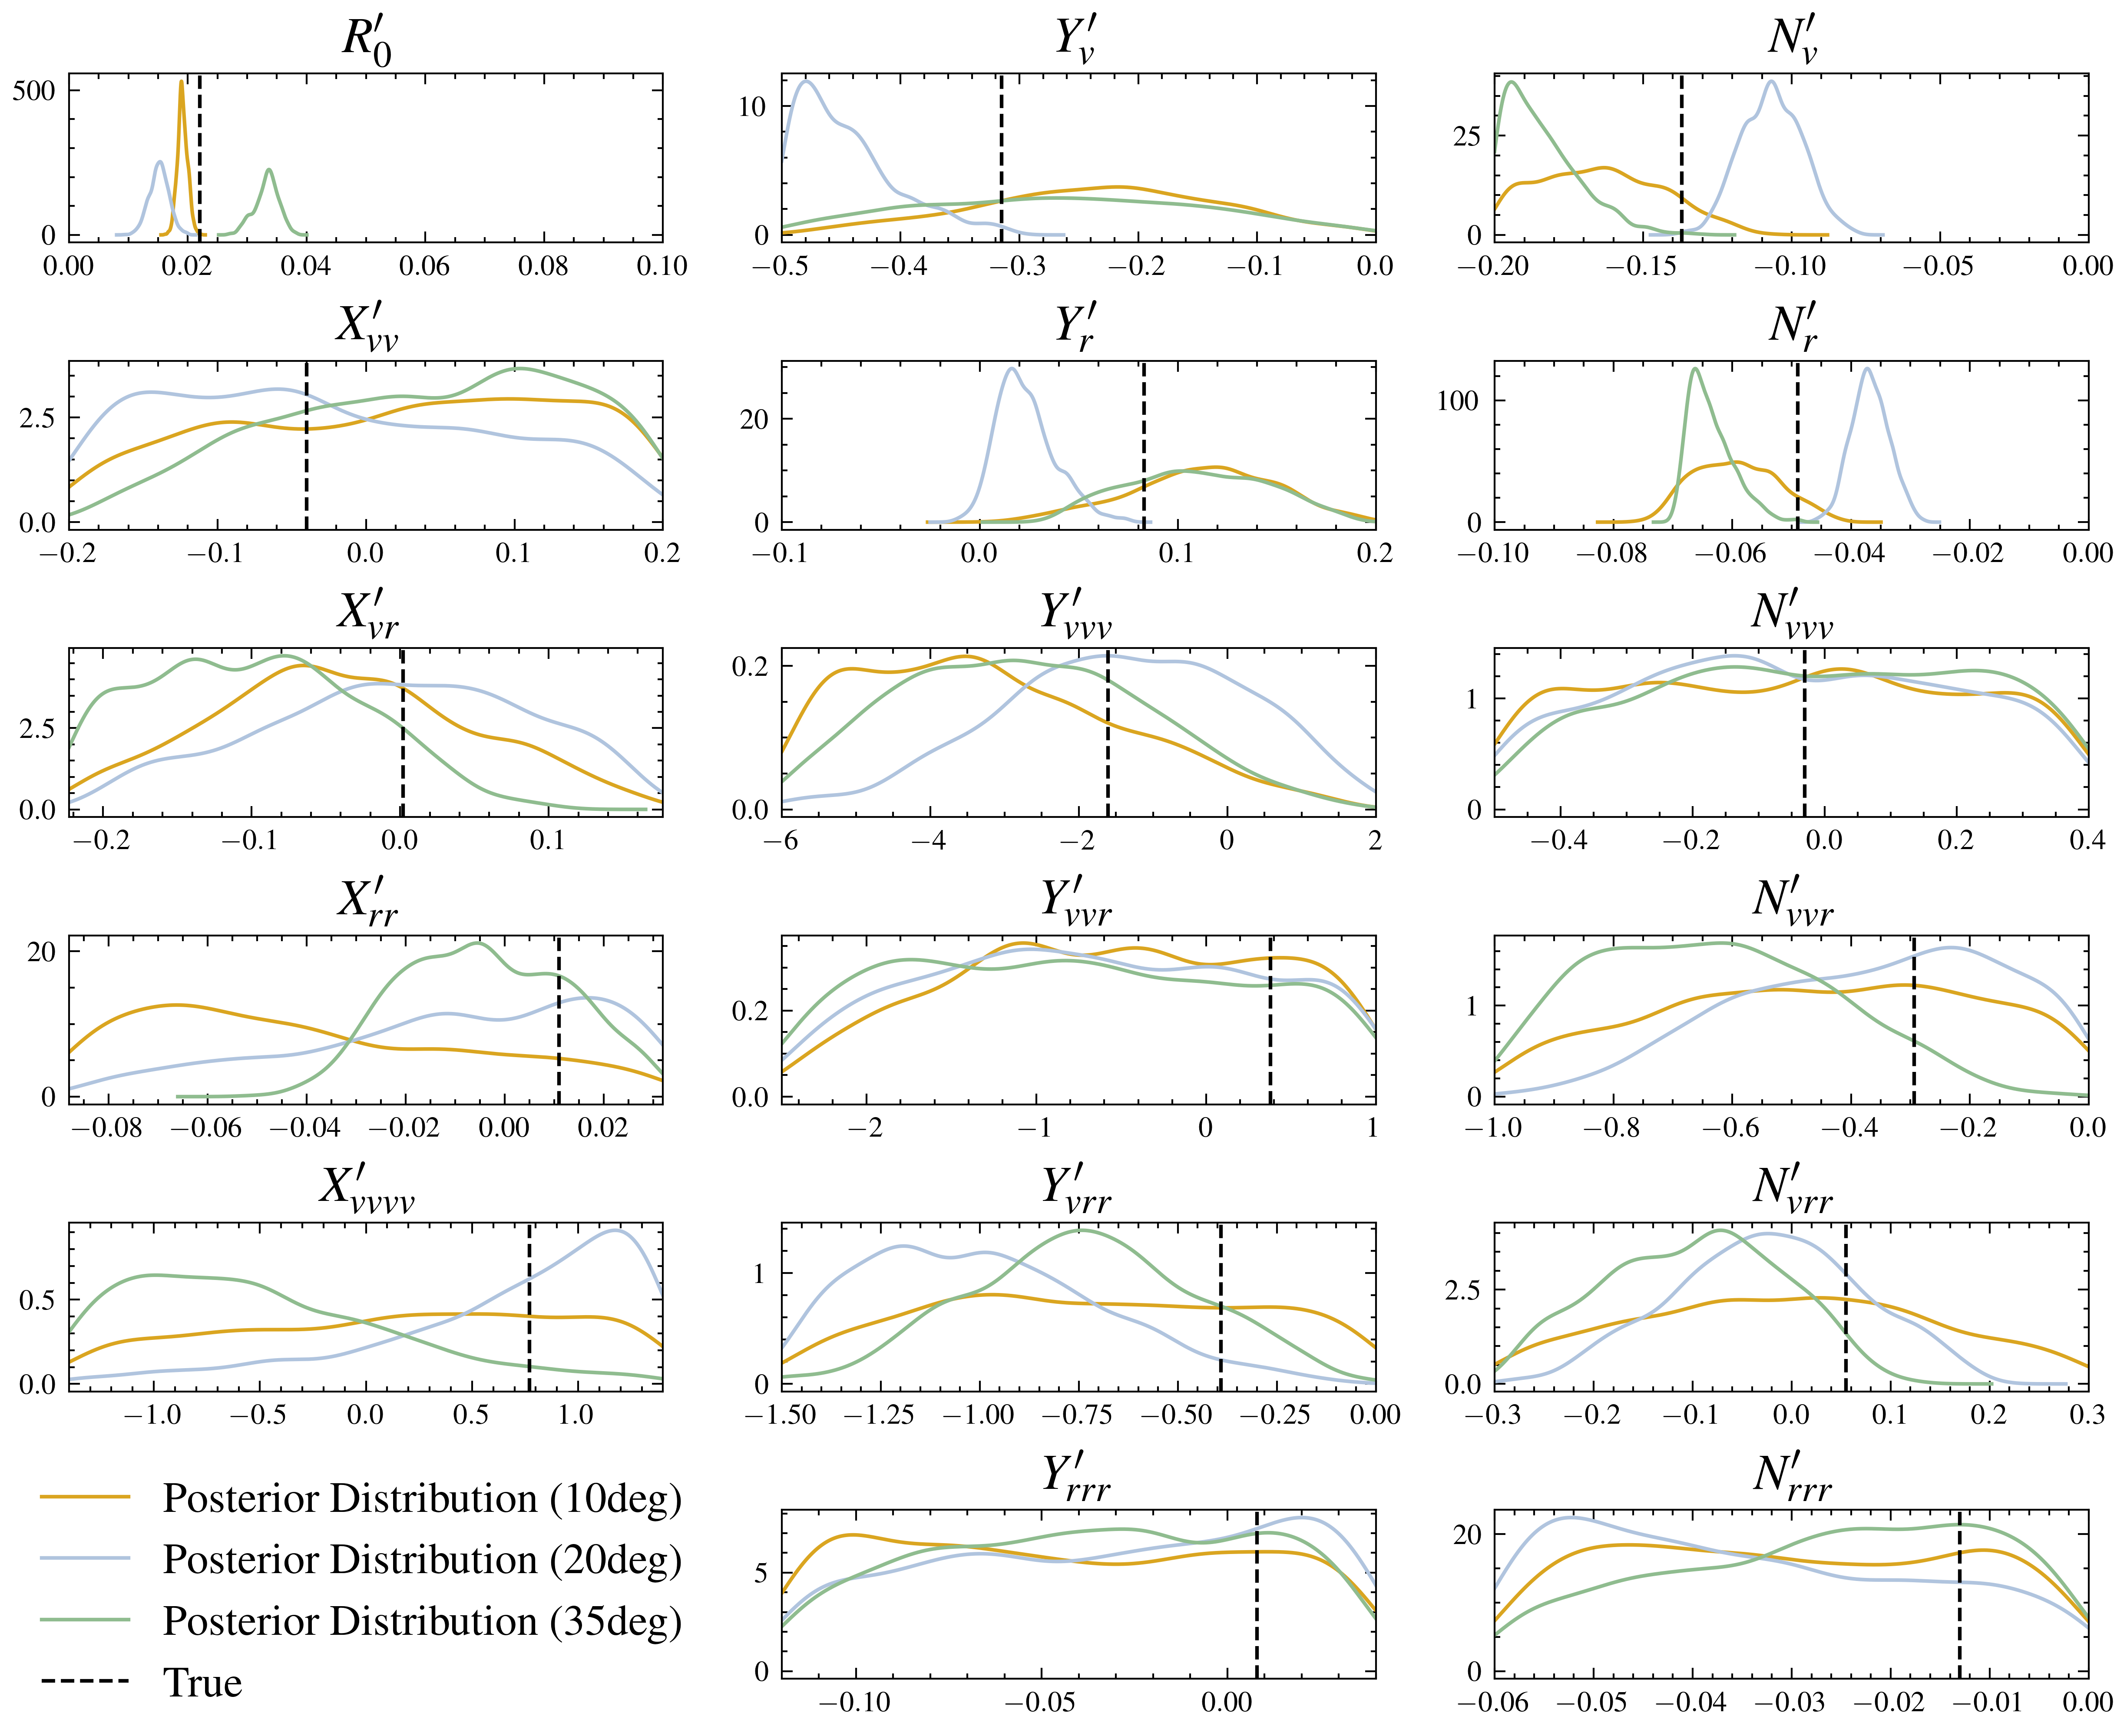

In [21]:
plt.style.use(["science", "ieee"])

# データの読み込み
data = CSV.read("../MCMC/result/10degL2MCMC_KVLCC2.csv", DataFrame)
data2 = CSV.read("../MCMC/result/20degL2MCMC_KVLCC2.csv", DataFrame)
data3 = CSV.read("../MCMC/result/35degL2MCMC_KVLCC2.csv", DataFrame)
fig = plt.figure(figsize=(10, 8))

start_num = 1
end_num = 1000
# R_0_dash
R_0_posterior = data.R_0[start_num:end_num]
R_0_posterior2 = data2.R_0[start_num:end_num]
R_0_posterior3 = data3.R_0[start_num:end_num]
kde_result = kde(R_0_posterior)
kde_result2 = kde(R_0_posterior2)
kde_result3 = kde(R_0_posterior3)
ax = fig.add_subplot(6, 3, 1)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.022, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"R_0^{\prime}",fontsize=14)
ax.set_xlim(0.00, 0.10)

# X_vv_dash
X_vv_posterior = data.X_vv[start_num:end_num]
X_vv_posterior2 = data2.X_vv[start_num:end_num]
X_vv_posterior3 = data3.X_vv[start_num:end_num]
kde_result = kde(X_vv_posterior)
kde_result2 = kde(X_vv_posterior2)
kde_result3 = kde(X_vv_posterior3)
ax = fig.add_subplot(6, 3, 4)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.040, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vv}^{\prime}",fontsize=14)

ax.set_xlim(-0.20, 0.20)

# X_vr_dash
X_vr_posterior = data.X_vr[start_num:end_num]
X_vr_posterior2 = data2.X_vr[start_num:end_num]
X_vr_posterior3 = data3.X_vr[start_num:end_num]
kde_result = kde(X_vr_posterior)
kde_result2 = kde(X_vr_posterior2)
kde_result3 = kde(X_vr_posterior3)
ax = fig.add_subplot(6, 3, 7)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.002, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vr}^{\prime}",fontsize=14)

ax.set_xlim(-0.223, 0.177)

# X_rr_dash
X_rr_posterior = data.X_rr[start_num:end_num]
X_rr_posterior2 = data2.X_rr[start_num:end_num]
X_rr_posterior3 = data3.X_rr[start_num:end_num]
kde_result = kde(X_rr_posterior)
kde_result2 = kde(X_rr_posterior2)
kde_result3 = kde(X_rr_posterior3)
ax = fig.add_subplot(6, 3, 10)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.011, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{rr}^{\prime}",fontsize=14)

ax.set_xlim(-0.088, 0.032)

# X_vvvv_dash
X_vvvv_posterior = data.X_vvvv[start_num:end_num]
X_vvvv_posterior2 = data2.X_vvvv[start_num:end_num]
X_vvvv_posterior3 = data3.X_vvvv[start_num:end_num]
kde_result = kde(X_vvvv_posterior)
kde_result2 = kde(X_vvvv_posterior2)
kde_result3 = kde(X_vvvv_posterior3)
ax = fig.add_subplot(6, 3, 13)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.771, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"X_{vvvv}^{\prime}",fontsize=14)

ax.set_xlim(-1.40, 1.40)

# Y_v_dash
Y_v_posterior = data.Y_v[start_num:end_num]
Y_v_posterior2 = data2.Y_v[start_num:end_num]
Y_v_posterior3 = data3.Y_v[start_num:end_num]
kde_result = kde(Y_v_posterior)
kde_result2 = kde(Y_v_posterior2)
kde_result3 = kde(Y_v_posterior3)
ax = fig.add_subplot(6, 3, 2)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.315, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"Y_{v}^{\prime}",fontsize=14)

ax.set_xlim(-0.50, 0.00)

# Y_r_dash
Y_r_posterior = data.Y_r[start_num:end_num]
Y_r_posterior2 = data2.Y_r[start_num:end_num]
Y_r_posterior3 = data3.Y_r[start_num:end_num]
kde_result = kde(Y_r_posterior)
kde_result2 = kde(Y_r_posterior2)
kde_result3 = kde(Y_r_posterior3)
ax = fig.add_subplot(6, 3, 5)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.083, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{r}^{\prime}",fontsize=14)

ax.set_xlim(-0.10, 0.20)

# Y_vvv_dash
Y_vvv_posterior = data.Y_vvv[start_num:end_num]
Y_vvv_posterior2 = data2.Y_vvv[start_num:end_num]
Y_vvv_posterior3 = data3.Y_vvv[start_num:end_num]
kde_result = kde(Y_vvv_posterior)
kde_result2 = kde(Y_vvv_posterior2)
kde_result3 = kde(Y_vvv_posterior3)
ax = fig.add_subplot(6, 3, 8)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-1.607, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vvv}^{\prime}",fontsize=14)

ax.set_xlim(-6.00, 2.00)

# Y_vvr_dash
Y_vvr_posterior = data.Y_vvr[start_num:end_num]
Y_vvr_posterior2 = data2.Y_vvr[start_num:end_num]
Y_vvr_posterior3 = data3.Y_vvr[start_num:end_num]
kde_result = kde(Y_vvr_posterior)
kde_result2 = kde(Y_vvr_posterior2)
kde_result3 = kde(Y_vvr_posterior3)
ax = fig.add_subplot(6, 3, 11)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.379, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vvr}^{\prime}",fontsize=14)

ax.set_xlim(-2.50, 1.00)

# Y_vrr_dash
Y_vrr_posterior = data.Y_vrr[start_num:end_num]
Y_vrr_posterior2 = data2.Y_vrr[start_num:end_num]
Y_vrr_posterior3 = data3.Y_vrr[start_num:end_num]
kde_result = kde(Y_vrr_posterior)
kde_result2 = kde(Y_vrr_posterior2)
kde_result3 = kde(Y_vrr_posterior3)
ax = fig.add_subplot(6, 3, 14)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.391, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{vrr}^{\prime}",fontsize=14)

ax.set_xlim(-1.50, 0.00)

# Y_rrr_dash
Y_rrr_posterior = data.Y_rrr[start_num:end_num]
Y_rrr_posterior2 = data2.Y_rrr[start_num:end_num]
Y_rrr_posterior3 = data3.Y_rrr[start_num:end_num]
kde_result = kde(Y_rrr_posterior)
kde_result2 = kde(Y_rrr_posterior2)
kde_result3 = kde(Y_rrr_posterior3)
ax = fig.add_subplot(6, 3, 17)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.008, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"Y_{rrr}^{\prime}",fontsize=14)

ax.set_xlim(-0.12, 0.04)

# N_v_dash
N_v_posterior = data.N_v[start_num:end_num]
N_v_posterior2 = data2.N_v[start_num:end_num]
N_v_posterior3 = data3.N_v[start_num:end_num]
kde_result = kde(N_v_posterior)
kde_result2 = kde(N_v_posterior2)
kde_result3 = kde(N_v_posterior3)
ax = fig.add_subplot(6, 3, 3)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.137, c="k", linestyle="--", linewidth=1.0)
# ax.set_ylabel(L"\textrm{Density}", fontsize=12)
ax.set_title(L"N_{v}^{\prime}",fontsize=14)

ax.set_xlim(-0.20, 0.00)

# N_r_dash
N_r_posterior = data.N_r[start_num:end_num]
N_r_posterior2 = data2.N_r[start_num:end_num]
N_r_posterior3 = data3.N_r[start_num:end_num]
kde_result = kde(N_r_posterior)
kde_result2 = kde(N_r_posterior2)
kde_result3 = kde(N_r_posterior3)
ax = fig.add_subplot(6, 3, 6)
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.049, c="k", linestyle="--", linewidth=1.0)

ax.set_title(L"N_{r}^{\prime}",fontsize=14)

ax.set_xlim(-0.10, 0.00)

# N_vvv_dash 
N_vvv_posterior = data.N_vvv[start_num:end_num]
N_vvv_posterior2 = data2.N_vvv[start_num:end_num]
N_vvv_posterior3 = data3.N_vvv[start_num:end_num]
kde_result = kde(N_vvv_posterior) 
kde_result2 = kde(N_vvv_posterior2)
kde_result3 = kde(N_vvv_posterior3)
ax = fig.add_subplot(6, 3, 9) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0)
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.030, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vvv}^{\prime}",fontsize=14) 
 
ax.set_xlim(-0.50, 0.40) 
# N_vvr_dash 
N_vvr_posterior = data.N_vvr[start_num:end_num]
N_vvr_posterior2 = data2.N_vvr[start_num:end_num]
N_vvr_posterior3 = data3.N_vvr[start_num:end_num]
kde_result = kde(N_vvr_posterior) 
kde_result2 = kde(N_vvr_posterior2)
kde_result3 = kde(N_vvr_posterior3)
ax = fig.add_subplot(6, 3, 12) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=-0.294, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vvr}^{\prime}",fontsize=14) 
 
ax.set_xlim(-1.00, 0.00) 
# N_vrr_dash 
N_vrr_posterior = data.N_vrr[start_num:end_num]
N_vrr_posterior2 = data2.N_vrr[start_num:end_num]
N_vrr_posterior3 = data3.N_vrr[start_num:end_num]
kde_result = kde(N_vrr_posterior) 
kde_result2 = kde(N_vrr_posterior2)
kde_result3 = kde(N_vrr_posterior3)
ax = fig.add_subplot(6, 3, 15) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod", linewidth=1.0) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen", linewidth=1.0)
ax.axvline(x=0.055, c="k", linestyle="--", linewidth=1.0) 
 
ax.set_title(L"N_{vrr}^{\prime}",fontsize=14) 
 
ax.set_xlim(-0.30, 0.30)
# N_rrr_dash 
N_rrr_posterior = data.N_rrr[start_num:end_num]
N_rrr_posterior2 = data2.N_rrr[start_num:end_num]
N_rrr_posterior3 = data3.N_rrr[start_num:end_num]
kde_result = kde(N_rrr_posterior) 
kde_result2 = kde(N_rrr_posterior2)
kde_result3 = kde(N_rrr_posterior3)
ax = fig.add_subplot(6, 3, 18) 
ax.plot(kde_result.x, kde_result.density, c="goldenrod",label="Posterior~Distribution~(10deg)", linewidth=1.0) 
ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue",label="Posterior~Distribution~(20deg)", linewidth=1.0)
ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen",label="Posterior~Distribution~(35deg)", linewidth=1.0)
# ax.plot(kde_result.x, kde_result.density, c="goldenrod",label="Noise~L1", linewidth=1.0) 
# ax.plot(kde_result2.x, kde_result2.density,"-", c="lightsteelblue",label="Noise~L2", linewidth=1.0)
# ax.plot(kde_result3.x, kde_result3.density,"-", c="darkseagreen",label="Noise~L3", linewidth=1.0)
ax.axvline(x=-0.013, c="k", linestyle="--", label="True", linewidth=1.0) 
ax.set_title(L"N_{rrr}^{\prime}",fontsize=14) 
ax.set_xlim(-0.06, 0.00) 

ax.legend(bbox_to_anchor=(-1.3, 1.4), fontsize=12)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.2)
display(fig)